In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Downloading the data
!curl https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD > scores.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28339    0 28339    0     0   123k      0 --:--:-- --:--:-- --:--:--  124k


In [3]:
# Moving the data file to PUIDATA
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [4]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [5]:
# move the data
!mv PL $PUIDATA

In [6]:
#test if the data is there
!ls $PUIDATA

scores.csv


In [7]:
# Reading the csv file using pandas
df = pd.read_csv("%s/scores.csv"%os.getenv("PUIDATA"))

In [13]:
# Printing the top 7 rows
df.head(7)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525


In [31]:
df[['SAT Critical Reading Avg. Score','SAT Writing Avg. Score']]=df[['SAT Critical Reading Avg. Score','SAT Writing Avg. Score']].apply(pd.to_numeric, errors='coerce')
df=df.dropna()

In [32]:
# Selecting two columns for new dataframe
df2=df[['SAT Critical Reading Avg. Score','SAT Writing Avg. Score']]

In [33]:
#Printing the top 7 rows of the reducted dataframe
df2.head(7)

,SAT Critical Reading Avg. Score,SAT Writing Avg. Score
0,355.0,363.0
1,383.0,366.0
2,377.0,370.0
3,414.0,359.0
4,390.0,384.0
5,332.0,316.0
6,522.0,525.0


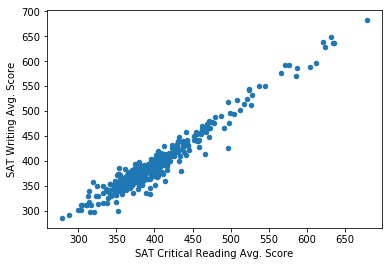

In [34]:
df2.plot(x="SAT Critical Reading Avg. Score", y="SAT Writing Avg. Score", kind='scatter')

Figure1: SAT Writing Avg. Score against the SAT Critical Reading Score as reported by the Department of Education for different schools in the year 2012. The plt shows a strong correlation for the two variables. 

In [2]:
# Using SODA API
url = "https://data.cityofnewyork.us/resource/734v-jeq5.json"

In [5]:
#using pandas read_json  to read json file
dfj = pd.read_json(url)

In [7]:
#printing the first 8 rows of the dataset
dfj.head(8)

,dbn,num_of_sat_test_takers,sat_critical_reading_avg_score,sat_math_avg_score,sat_writing_avg_score,school_name
0,01M292,29,355,404,363,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1,01M448,91,383,423,366,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2,01M450,70,377,402,370,EAST SIDE COMMUNITY SCHOOL
3,01M458,7,414,401,359,FORSYTH SATELLITE ACADEMY
4,01M509,44,390,433,384,MARTA VALLE HIGH SCHOOL
5,01M515,112,332,557,316,LOWER EAST SIDE PREPARATORY HIGH SCHOOL
6,01M539,159,522,574,525,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ..."
7,01M650,18,417,418,411,CASCADES HIGH SCHOOL


In [8]:
# Downloading the data
!curl https://data.cityofnewyork.us/api/views/tavr-zknk/rows.csv?accessType=DOWNLOAD > usage.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4782    0  4782    0     0   1275      0 --:--:--  0:00:03 --:--:--  1275


In [9]:
# Moving the data file to PUIDATA
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [10]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [11]:
# move the data
!mv usage.csv $PUIDATA

In [12]:
#test if the data is there
!ls $PUIDATA

scores.csv  usage.csv


In [3]:
# Reading the csv file using pandas
dfus = pd.read_csv("%s/usage.csv"%os.getenv("PUIDATA"))

In [4]:
# Printing the top 7 rows
dfus.head(7)

,DSNY Storm #,Date of Report,Manhattan,Bronx,Brooklyn,Queens,Staten Island,Total Tons
0,Storm 1,01/19/2016 12:00:00 AM,1111,2059,2690,6625,2931,15416
1,Storm 2,01/23/2016 12:00:00 AM,2919,4567,5521,9253,4264,26524
2,Storm 2,01/24/2016 12:00:00 AM,6582,8167,12290,17133,5411,49583
3,Storm 2,01/25/2016 12:00:00 AM,3862,4094,6217,10236,1256,25665
4,Storm 2,01/26/2016 12:00:00 AM,2499,3299,5120,7685,764,19367
5,Storm 2,01/27/2016 12:00:00 AM,2609,2007,4619,5656,1830,16721
6,Storm 2,01/28/2016 12:00:00 AM,1878,2017,2889,4090,560,11434


In [5]:
# Selecting two columns for new dataframe
dfus2=dfus[['Date of Report ','Total Tons ']]

In [6]:
#Printing the top 7 rows of the reducted dataframe
dfus2.head(7)

,Date of Report,Total Tons
0,01/19/2016 12:00:00 AM,15416
1,01/23/2016 12:00:00 AM,26524
2,01/24/2016 12:00:00 AM,49583
3,01/25/2016 12:00:00 AM,25665
4,01/26/2016 12:00:00 AM,19367
5,01/27/2016 12:00:00 AM,16721
6,01/28/2016 12:00:00 AM,11434


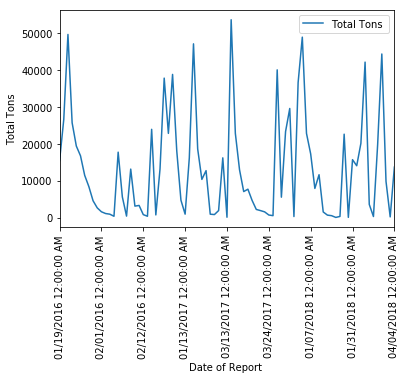

In [7]:
ax =dfus2.plot(x='Date of Report ', y='Total Tons ',rot=90)
ax.set_ylabel('Total Tons')

Figure 1: The plot shows the salt usage in tons from the year 2016 to 2018 as reported by the Department of Sanitation New York(DSNY).The plot shows that salt usage is particularly high in the month of January.